# Supervised Learning
# Activity: Building a Student Intervention System

# Question 1 - Classification vs. Regression
Your goal for this project is to identify students who might need early intervention before they fail or pass.
Which type of supervised learning problem is this, classification or regression? Why?

**This is a Classification problem, because there are two discrete outcomes which deals with 'yes' or 'no' question.
i.e, to predict whether a student is going to be succesful or not.**

# Question-2
load necessary Python libraries and load the student data. Note that the last column from this dataset, 'passed',
will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('student-data.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [3]:
df.shape

(395, 31)

# Question-3
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:

 - The total number of students, n_students.
 - The total number of features for each student, n_features.
 - The number of those students who passed, n_passed.
 - The number of those students who failed, n_failed.
 - The graduation rate of the class, grad_rate, in percent (%).

In [4]:
# Calculate number of students
n_students = len(df)

In [5]:
# Calculate number of features
n_features = len(df.keys())-1

In [6]:
# Calculate passing students
n_passed = len(df[df['passed']=='yes'])

In [7]:
# Calculate failing students
n_failed = len(df[df['passed']=='no'])

In [8]:
# Calculate graduation rate
grad_rate = n_passed/n_students*100

In [9]:
# Print the results
print("Total number of students: {}".format(n_students))
print("Number of features: {}".format(n_features))
print("Number of students who passed: {}".format(n_passed))
print("Number of students who failed: {}".format(n_failed))
print("Graduation rate of the class: {:.2f}%".format(grad_rate))

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


# Question-4 
Identify feature and target columns
separate the student data into feature and target columns to see if any features are non-numeric.

In [10]:
# Extract feature columns
feature_cols = list(df.columns[:-1])
print("Feature columns:\n{}".format(feature_cols))

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


In [11]:
# Extract target column 'passed'
target_col = df.columns[-1]
print("Target column: {}".format(target_col))

Target column: passed


In [12]:
# Separate the data into feature data and target data (X and y, respectively)
x = df[feature_cols]
y = df[target_col]

In [13]:
print("\nFeature values:")
print(x.head())


Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  higher internet  romantic  famrel  freetime goout Dalc Walc health absences  
0    yes       no        no       4         3     4    1    1      3        6  
1    yes      yes        no       5         3     3    1    1      3        4  
2    yes      yes        no       4         3     2    2    3      3       10  
3    yes      yes       yes       3         2     2    1    1      5        2  
4    yes       no        no       4         3     2    1    2      5        4  

[5 rows x 30 co

# Question-5 Preprocess Feature Columns
As you can see, there are several non-numeric columns that need to be converted! Many of them are simply yes/no,
e.g. internet. These can be reasonably converted into 1/0 (binary) values.

Other columns, like Mjob and Fjob, have more than two values, and are known as categorical variables.
The recommended way to handle such a column is to create as many columns as possible values
(e.g. Fjob_teacher, Fjob_other, Fjob_services, etc.), and assign a 1 to one of them and 0 to all others.

These generated columns are sometimes called dummy variables, and we will use the pandas.get_dummies() function
to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [14]:
def preprocess_features(X):
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace([1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        output = output.join(col_data)
    
    return output

x = preprocess_features(x)
x.head()

,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,internet_yes,romantic_no,romantic_yes,famrel,freetime,goout,Dalc,Walc,health,absences
0,1,0,1,0,18,0,1,1,0,1,...,0,1,0,4,3,4,1,1,3,6
1,1,0,1,0,17,0,1,1,0,0,...,1,1,0,5,3,3,1,1,3,4
2,1,0,1,0,15,0,1,0,1,0,...,1,1,0,4,3,2,2,3,3,10
3,1,0,1,0,15,0,1,1,0,0,...,1,0,1,3,2,2,1,1,5,2
4,1,0,1,0,16,0,1,1,0,0,...,0,1,0,4,3,2,1,2,5,4


In [15]:
print(x.columns.tolist())

['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup_no', 'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


# Question - 6 Implementation: Training and Testing Data Split
So far, we have converted all categorical features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. you will need to implement the following:

- Randomly shuffle and split the data (X, y) into training and testing subsets.

 * Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
 * Set a random_state for the function(s) you use, if provided.
 * Store the results in X_train, X_test, y_train, and y_test.

In [16]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split

#Set the number of training points
num_train = 300
# Set the number of testing points
num_test = x.shape[0] - num_train

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size=95, random_state=42)

# Show the results of the split
print ("Training set has {} samples.".format(x_train.shape[0]))
print ("Testing set has {} samples.".format(x_test.shape[0]))

Training set has 300 samples.
Testing set has 95 samples.


# Question - 7 Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in 
scikit-learn. You will first discuss the reasoning behind choosing these three models by considering
what you know about the data and each model's strengths and weaknesses.
You will then fit the model to varying sizes of training data and measure the accuracy score.

**In this section, I will choose 3 supervised learning models that are appropriate for this problem which is available in scikit-learn.**

**1.Decision Tree Classifier**

The **general applications of Decision Tree Classifier** In decision analysis, a decision tree can be used to
visually and explicitly represent decisions and decision making. In data mining, a decision tree describes data
but not decisions; rather the resulting classification tree can be an input for decision making

**Strengths and Weaknesses**
   + Intuitive and simple to understand and interpret
   + Able to handle both numerical and categorical data
   + Furthermore, it is a white box model. If a given situation is observable in a model the explanation 
     for the condition is easily explained by boolean logic.
-----------    
   - Easy to overfitting if we don’t tune the parameters.
   - Data including categorical variables with different numbers of levels, information gain in decision trees is
     biased in favor of those attributes with more levels.
   - Decision tree learning algorithms are based on heuristics such as the greedy algorithm where locally-optimal decisions
     are made at each node.
     
**Reason:** The reason I chose this model instead of using random forest is because somehow if we don’t tune the models both decision tree and random forest tend to overfit easily. As a result, I chose Decision Tree at the first place so as to get more intuitive results.

**2.Support Vector Machine**

The **general applications of Support Vector Machine:**
Support Vector Machine can be used for both classification and regression problems. For classification,
general applications can be text categorization or image classification.

**Strengths and Weaknesses**
   + Works well in high dimensional spaces even if there are more dimensions than samples.
   + Memory efficient for using support vectors.
   + Using a nonlinear kernel trick, we can capture a more complex relationship between the datapoints.
------------  
   - For a large dataset with a lot of noise, SVMs will be slow and possibly produce overfitting.
   - If there are too many features than samples, SVM will perform poorly
    
**Reason:** The reason I chose this model, a non linear SVM will work better than a linear SVM because there are 
    30 features and based on that the data will not be linearly separable. Furthermore, the default kernel in sklearn
    is rbf which means I can see the expecting result before tuning the parameters. Also Non Linear SVM works well 
    for a high dimensional data like the student data.

**3.K-Nearest Neighbors**

The **general applications of K-Nearest Neighbors:** K nearest neighbors is used as a base classifier in this project. 
    General application for KNN can be computer vision or recommending systems.

**Strengths and Weaknesses**

  + Reduces variance and avoids overfitting.
  + KNN could be successful in classification problems where the decision boundary is irregular.
--------------
  - KNN stores instances of the training data and computes nearest neighbors of each point so running time
    is very slow compared to other models when predicting.
  - KNN is a lazy learner. It will be slow during prediction when too many data points.

**Reason:** Based on the features, I predicted that the decision boundary would be not linear at all and KNN seems to be
       a non parametric thus the decision boundary is flexible.
  

In [17]:
# Import the three supervised learning models from sklearn
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# fit model-1  on traning data 
model = svm.SVC()
model.fit(x_train,y_train)
# predict on the test data
prediction=model.predict(x_test)

In [19]:
# calculate the accuracy score
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy is:", metrics.accuracy_score(prediction,y_test))

Accuracy is: 0.6736842105263158


In [20]:
# fit the model-2 on traning data and predict on the test data and measure the accuracy.
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    acc = accuracy_score(y_test,prediction)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

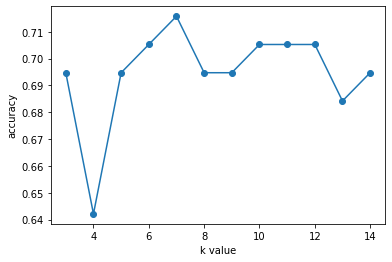

In [21]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [22]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,y_test))

The accuracy of the KNN is 0.6947368421052632


In [23]:
# fit the model-3 on traning data and predict on the test data and measure the accuracy
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

prediction=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))

Accuracy: 0.6105263157894737


**In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning.**
Maximum depth of the tree can be used as a control variable for pre-pruning. In this example, 
We can plot a decision tree on the same data with **max_depth=3**. Other than pre-pruning parameters,
We can also try other attribute selection measure such as **entropy.**

In [24]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer
clf.fit(x_train,y_train)
#predict on the test data
prediction=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))

Accuracy: 0.6631578947368421


Here,the classification rate increased to 66.31%, which is better accuracy than the previous model.

Choosing the Best Model:- 
Hence, the performance of **KNN** is much better than the other two models.